In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
mart = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
mart.shape

(8523, 12)

We can see that our dataset have 8523 rows and 12 columns.

In [4]:
mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

From the above data we can see that few columns in the dataset have null values.

In [5]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


From the above data we can check the types of dataset columns. Int and float represensent numerical values and object represents string values.

<function matplotlib.pyplot.show(*args, **kw)>

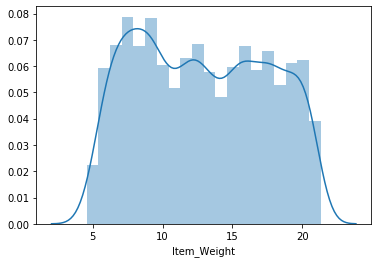

In [6]:
plt.figure()
sns.distplot(mart['Item_Weight'])
plt.show

From the above representation we can see that data is not distributed normally. So we will proceed with median to fill nan values

        1.removing null values
        2.As the column Item_Weight has numerical value we will use mean to fill the null values and Outlet_Size has object data type so will use mode to fill the null values.

In [7]:
mart['Item_Weight'] = mart['Item_Weight'].fillna(mart['Item_Weight'].mean())

In [8]:
mart['Outlet_Size'] = mart['Outlet_Size'].fillna(mart['Outlet_Size'].mode()[0])

In [9]:
mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We have successfully removed the null values from the columns

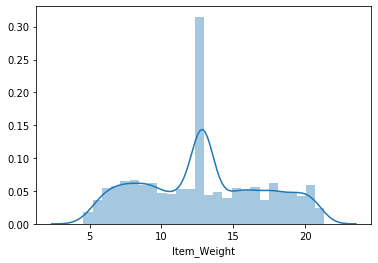

In [10]:
sns.distplot(mart['Item_Weight'])

We can see that data is skewed as the data is not normally distributed.

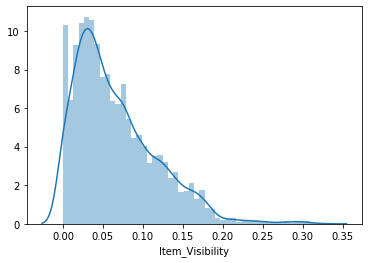

In [11]:
sns.distplot(mart['Item_Visibility'])

We have left skewness in this columns.

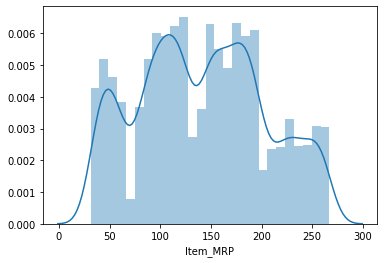

In [12]:
sns.distplot(mart['Item_MRP'])

Here we can see that the data is skewed because there are few los values products and few high or medium valued projects.

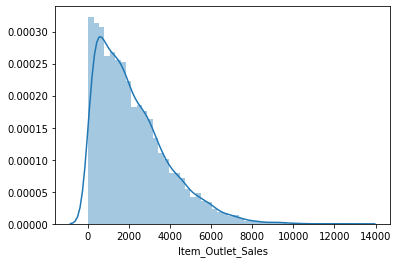

In [13]:
sns.distplot(mart['Item_Outlet_Sales'])

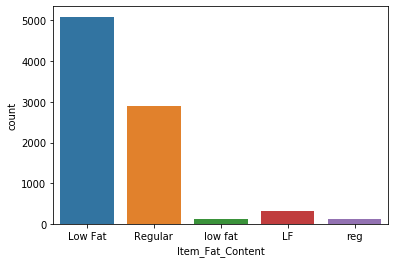

In [14]:
sns.countplot(mart['Item_Fat_Content'])

Here we can check that low_fat products are higher in number than regular

<function matplotlib.pyplot.show(*args, **kw)>

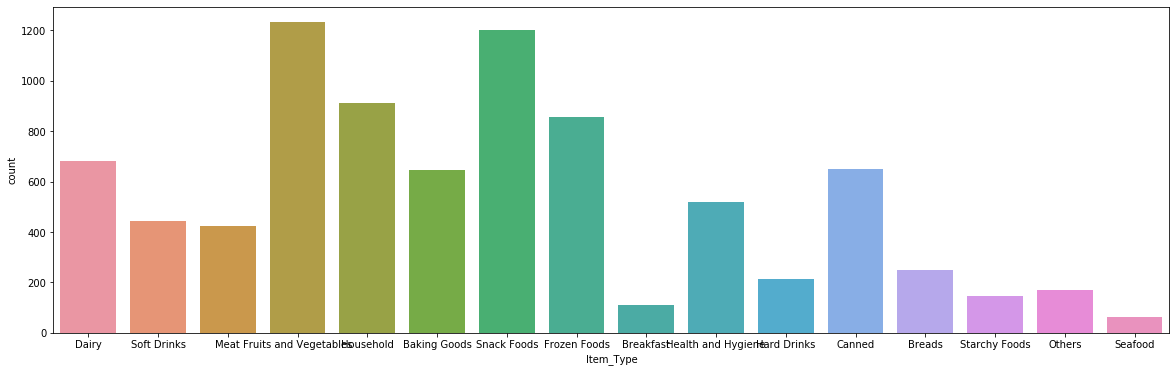

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(mart['Item_Type'])
plt.show

The above graph shows tha types of products in the mart. fruits abd vegetables are hugely sold in the marts and snacks and goods after that. breakfast and seafood are leat selling type in the mart

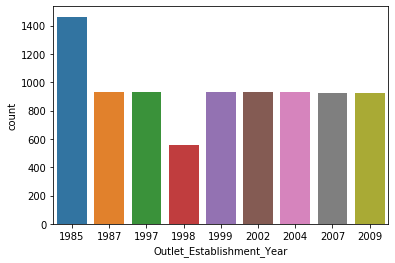

In [16]:
sns.countplot(mart['Outlet_Establishment_Year'])

from the above graph we can say that the most of the mart's stores are started in year 1985 and after till 2009 the mart have opened same no of stores apart from 1987 where the mart had opened lesser(600) stores

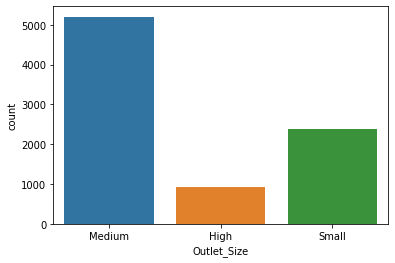

In [17]:
sns.countplot(mart['Outlet_Size'])

From the above graph we can say that most of the stores are medium sized and lesser stores with high mart size.

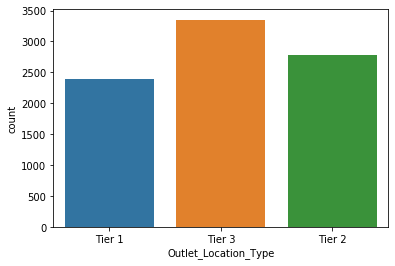

In [18]:
sns.countplot(mart['Outlet_Location_Type'])

From the above graph we can say that most of the stores are at tier 3 location and least at tier 1 location

<function matplotlib.pyplot.show(*args, **kw)>

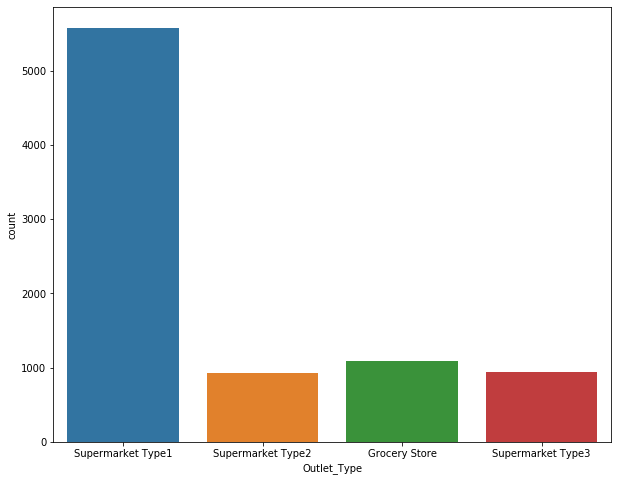

In [19]:
plt.figure(figsize = (10,8))
sns.countplot(mart['Outlet_Type'])
plt.show

from the above graph we can say that most pf the marts are or type: supermarket type 1 and also they have grocery stores.

<Figure size 864x432 with 0 Axes>

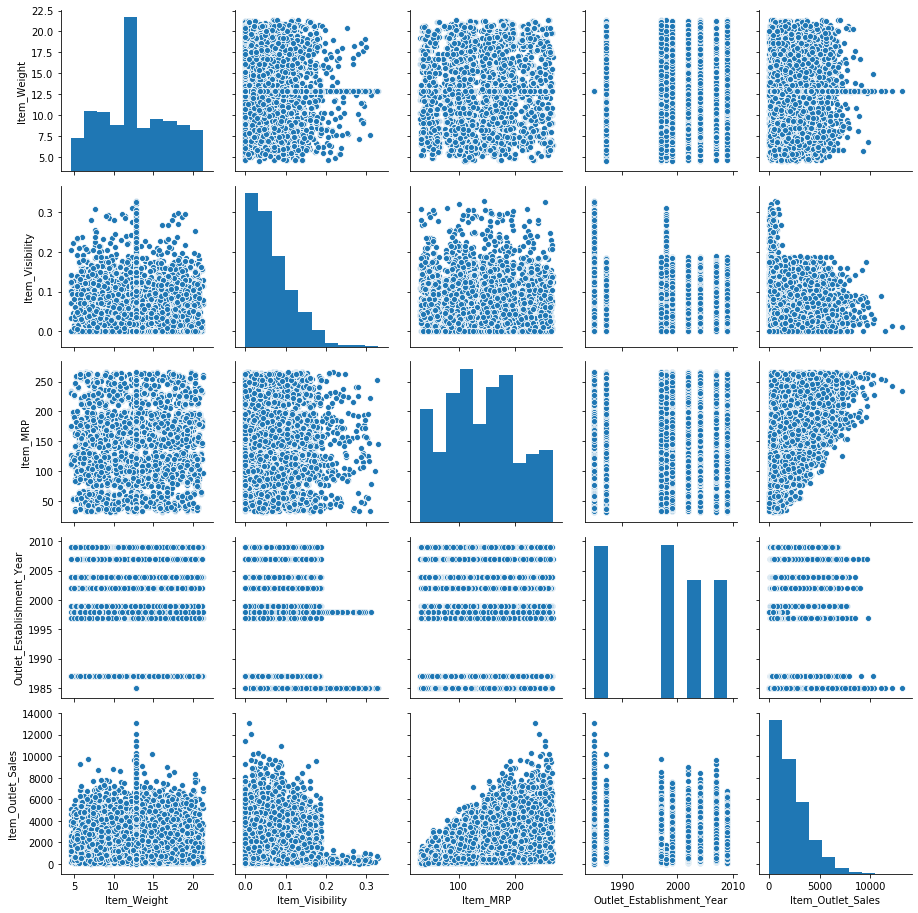

In [20]:
plt.figure(figsize = (12,6))
sns.pairplot(mart)
plt.show()

The above is pairplot for the dataset. This represents the data set with numerical values and shows relationship between different variables

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mart["Item_Fat_Content"] = le.fit_transform(mart['Item_Fat_Content'])
mart["Item_Type"] = le.fit_transform(mart['Item_Type'])
mart["Outlet_Identifier"] = le.fit_transform(mart['Outlet_Identifier'])
mart["Outlet_Size"] = le.fit_transform(mart['Outlet_Size'])
mart["Outlet_Location_Type"] = le.fit_transform(mart['Outlet_Location_Type'])
mart["Outlet_Type"] = le.fit_transform(mart['Outlet_Type'])

Above we converted the values to numerical using encoding

Item_Weight                      AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Item_Fat_Content              AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Item_Visibility               AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Item_Type                     AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Item_MRP                      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Outlet_Identifier             AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Outlet_Establishment_Year     AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Outlet_Size                     AxesSubplot(0.125,0.518913;0.0945122x0.16413)
Outlet_Location_Type         AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
Outlet_Type                  AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
Item_Outlet_Sales            AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
dtype: object

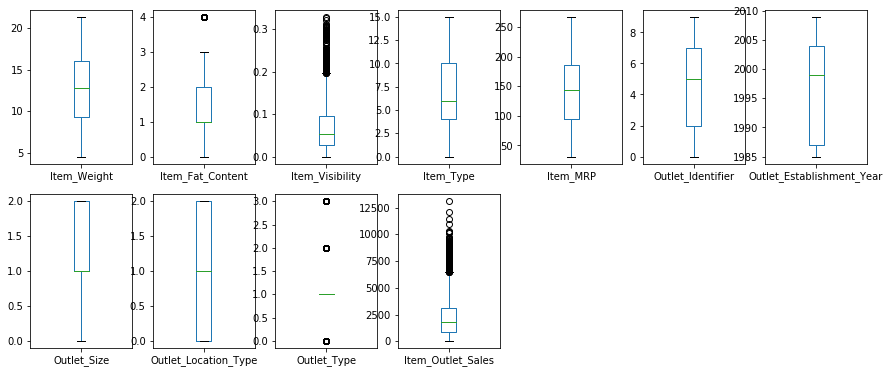

In [22]:
mart.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

We can see columns having outliers:-

        1.Item_Visibility
        2.Outlet_Type

Using IQR method to remove outliers

In [23]:
q1 = mart['Item_Visibility'].quantile(.25)
q3 = mart['Item_Visibility'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


mart['Item_Visibility'] = np.where(
    mart['Item_Visibility'] > high_range,
    high_range,
    np.where(
        mart['Item_Visibility'] < low_range,
        low_range,
        mart['Item_Visibility']
    )
)

25 quartile of is: 0.026989477499999998
75 quartile of is: 0.0945852925
The IQR value is: 0.067595815
The high value is 0.195979015
The low value is -0.07440424500000001


Item_Visibility    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

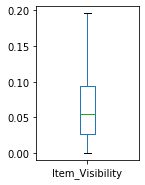

In [24]:
mart['Item_Visibility'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

In [25]:
q1 = mart['Outlet_Type'].quantile(.25)
q3 = mart['Outlet_Type'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


mart['Outlet_Type'] = np.where(
    mart['Outlet_Type'] > high_range,
    high_range,
    np.where(
        mart['Outlet_Type'] < low_range,
        low_range,
        mart['Outlet_Type']
    )
)

25 quartile of is: 1.0
75 quartile of is: 1.0
The IQR value is: 0.0
The high value is 1.0
The low value is 1.0


Outlet_Type    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

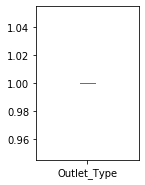

In [26]:
mart['Outlet_Type'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

Outliers removed from the columns using IQR method.

In [27]:
mart.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,-0.011928,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,NaN,0.011550
Item_Fat_Content,-0.017331,1.000000,0.036957,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,NaN,0.009800
Item_Visibility,-0.011928,0.036957,1.000000,-0.036213,-0.001163,-0.091872,-0.064105,0.061625,-0.023894,NaN,-0.117918
Item_Type,0.028015,-0.115958,-0.036213,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,NaN,0.017048
Item_MRP,0.024756,-0.000876,-0.001163,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,NaN,0.567574
Outlet_Identifier,-0.007975,-0.002357,-0.091872,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,NaN,0.162325
Outlet_Establishment_Year,-0.008301,-0.000189,-0.064105,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,NaN,-0.049135
Outlet_Size,-0.007225,-0.012058,0.061625,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,NaN,-0.086182
Outlet_Location_Type,0.004088,-0.004102,-0.023894,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,NaN,0.089367
Outlet_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


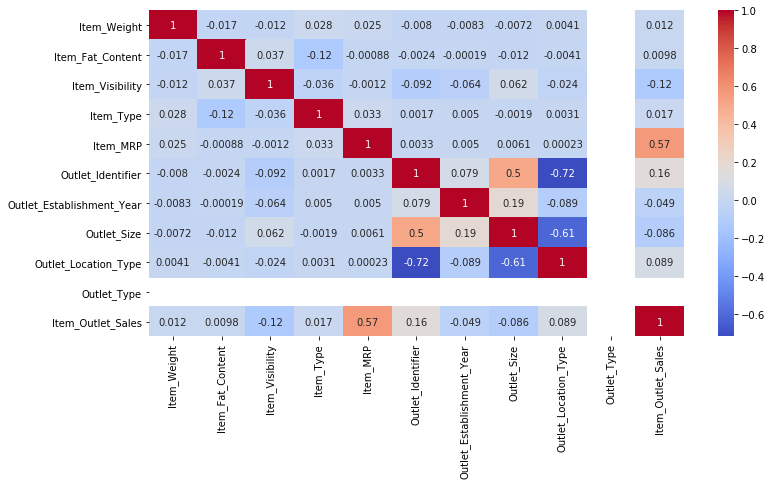

In [28]:
plt.figure(figsize = (12,6))
sns.heatmap(mart.corr(),annot=True,cmap='coolwarm')

From the above graph we can see that our label is how much correlated with the independant variables. The label is negatively corelated with:-

    1.Outlet_size
    2.outlet_establishment_year
    3.item_visibility

In [29]:
mart.drop('Outlet_Establishment_Year', axis = 1, inplace =True)
mart.drop('Item_Identifier', axis = 1, inplace =True)
mart.drop('Outlet_Identifier', axis = 1, inplace =True)

In [30]:
mart.shape

(8523, 9)

In [31]:
x = mart.iloc[:,0:8]

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [33]:
y = mart['Item_Outlet_Sales']

We have separated the dataset to X and y to fetch it for testing and training purpose.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [35]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svc = SVR()
rnd = RandomForestRegressor()

In [36]:
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("AT random state",i,"the model performing good")

AT random state 1 the model performing good
AT random state 33 the model performing good
AT random state 130 the model performing good
AT random state 135 the model performing good
AT random state 150 the model performing good


We have found the random state where our model is performing good

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 150)
print(dtc.fit(x_train,y_train))
print(lr.fit(x_train,y_train))
print(svc.fit(x_train,y_train))
print(rnd.fit(x_train,y_train))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
             

We have fitted the train data to our model.

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
pred_dtc = dtc.predict(x_test)

print('Means absolute error', mean_absolute_error(y_test,pred_dtc))
print('Means Squared Error',mean_squared_error(y_test,pred_dtc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_dtc)))
print('Model Score',r2_score(y_test,pred_dtc))

Means absolute error 1151.0385544868036
Means Squared Error 2671447.142925108
Root mean square 1634.4562223948085
Model Score 0.11465560036893807


In [39]:
pred_lr = lr.predict(x_test)
print('Means absolute error', mean_absolute_error(y_test,pred_lr))
print('Means Squared Error',mean_squared_error(y_test,pred_lr))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Model Score',r2_score(y_test,pred_lr))

Means absolute error 1049.26862325901
Means Squared Error 1977399.881197323
Root mean square 1406.2005124438417
Model Score 0.344669829876452


In [40]:
pred_svc = svc.predict(x_test)
print('Means absolute error', mean_absolute_error(y_test,pred_svc))
print('Means Squared Error',mean_squared_error(y_test,pred_svc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_svc)))
print('Model Score',r2_score(y_test,pred_svc))

Means absolute error 1264.5510458615763
Means Squared Error 2881524.9656922235
Root mean square 1697.505512713353
Model Score 0.04503370110504279


In [41]:
pred_rnd = rnd.predict(x_test)
print('Means absolute error', mean_absolute_error(y_test,pred_rnd))
print('Means Squared Error',mean_squared_error(y_test,pred_rnd))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_rnd)))
print('Model Score',r2_score(y_test,pred_rnd))

Means absolute error 880.9787851741936
Means Squared Error 1491773.7080114123
Root mean square 1221.3818845927806
Model Score 0.5056112184729111


Above we calculated the mean absolute error, mean squarred error and squre root of the error, they represents the difference between the actual value and predicted value

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' :[100,200,300,400,500,600,700,800],
               'criterion'  :['squared_error','mse','absolute_error','poisson'],
               'max_depth' :[300,400,500,600,700,800],
               'min_samples_split' :[100,200,300,400,500]   
             }

grid_cv = GridSearchCV(estimator=rnd, param_grid = parameters)
grid_cv.fit(x_test, y_test)
best_para = grid_cv.best_params_
print(best_para)
best_result = grid_cv.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'mse', 'max_depth': 600, 'min_samples_split': 100, 'n_estimators': 400}
0.3815204442944277
0.38


In [43]:
from sklearn.model_selection import cross_val_score
score_dtc=cross_val_score(dtc,x,y,cv=5)
print(score_dtc)
print(score_dtc.mean())
print(score_dtc.std())

[ 0.089828    0.0376347  -0.00066584  0.13234916  0.09760621]
0.07135044623605835
0.047063201745293645


In [44]:
score_lr=cross_val_score(lr,x,y,cv=5)
print(score_lr)
print(score_lr.mean())
print(score_lr.std())

[0.35558077 0.34679135 0.33971517 0.34407589 0.33145708]
0.34352405368239136
0.007955673177906866


In [45]:
score_svc=cross_val_score(svc,x,y,cv=5)
print(score_svc)
print(score_svc.mean())
print(score_svc.std())

[0.04136521 0.06028214 0.04105711 0.0509105  0.05367443]
0.049457877806293515
0.0073907829984647564


In [46]:
score_rnd=cross_val_score(rnd,x,y,cv=5)
print(score_rnd)
print(score_rnd.mean())
print(score_rnd.std())

[0.5182988  0.48152756 0.46350639 0.48769758 0.50038104]
0.4902822718654309
0.018369454496546818


In [47]:
print('Model Score',r2_score(y_test,pred_dtc))
print('Mean Score After CV',score_dtc.mean())
print("Model Score is", r2_score(y_test,pred_dtc)-score_dtc.mean())

Model Score 0.11465560036893807
Mean Score After CV 0.07135044623605835
Model Score is 0.04330515413287972


In [48]:
print('Model Score',r2_score(y_test,pred_lr))
print('Mean Score After CV',score_lr.mean())
print("Model Score is", r2_score(y_test,pred_lr)-score_lr.mean())

Model Score 0.344669829876452
Mean Score After CV 0.34352405368239136
Model Score is 0.0011457761940606437


In [49]:
print('Model Score',r2_score(y_test,pred_svc))
print('Mean Score After CV',score_svc.mean())
print("Model Score is", r2_score(y_test,pred_svc)-score_svc.mean())

Model Score 0.04503370110504279
Mean Score After CV 0.049457877806293515
Model Score is -0.004424176701250726


In [50]:
print('Model Score',r2_score(y_test,pred_rnd))
print('Mean Score After CV',score_rnd.mean())
print("Model Score is", r2_score(y_test,pred_rnd)-score_rnd.mean())

Model Score 0.5056112184729111
Mean Score After CV 0.4902822718654309
Model Score is 0.015328946607480243


In [51]:
import pickle
filename = 'big_mart_Sales.pkl'
pickle.dump(rnd, open(filename, 'wb'))